## HW 2. 

You will repeat the main procedures from Lecture 2 in much simplified steps using a different data set (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

1. Download the data using urllib and read the file into pandas dataframe.

2. Print at the statistics of continuous variables.

3. Create a pipeline of simple median imputer and standard scaler.

4. Set the random seed to 0. Split the training (80%) and the test set (20%) using scikit-learn (no stratified sampling necessary.)

5. Fit a linear regression model to the training data. Report Training MAE and Test MAE.

NOTE: Add comments for each step such as your observations on the results, etc. To make grading easy, please leave all cell open and leave the results.

## Imports
Here I'm copying and pasting the imports for what comes after

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 0 Downloading the data, fixing it, and hosting it
*disclaimer: Some parts of this section won't work as I had to manually alter the data file.*

Changing the code a bit to get the new data

In [2]:
import tarfile
import urllib.request

DATA_URL = "ftp://ftp.cs.toronto.edu/pub/neuron/delve/data/tarfiles/boston.tar.gz"
HOUSING_PATH = "data"

def fetch_housing_data(housing_url=DATA_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

Checking out the data, it comes in a weird format so I used **notepad++** to remove the backslashes with the line skips to make it readable using the pandas csv reader.

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    data_path = os.path.join(housing_path,"boston", "Dataset.data")
    return pd.read_csv(data_path,sep=" ", header=None)


From here to the end of the section the code won't run on Colab as I did the edits locally and the data file won't exist, you can skip to section 1.

In [12]:
housing = load_housing_data()

Adding headers by hand and removing empty first column.

In [20]:
data_headers=[
    "Delete",
    "CRIM",
    "ZN",
    "NDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV"
]

housing.columns=data_headers
housing.drop(columns=["Delete"], inplace=True)

In [21]:
housing.head()

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


saving it somewhere so you can reproduce the code

In [22]:
housing.to_csv(index=False, path_or_buf="readable_data.csv")

## 1 Download working data and reading it into pandas dataframe
Now that the data is a regular csv the process should be straight forward.

In [6]:
import urllib.request
import pandas as pd

DATA_URL = "https://sergiogyoz.github.io/Machine-Learning/HWs/HW2/readable_data.csv"
HOUSING_PATH = "data"

def fetch_housing_data(housing_url=DATA_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    data_path = os.path.join(housing_path, "housing.csv")
    urllib.request.urlretrieve(housing_url, data_path)

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

housing = load_housing_data()

In [7]:
housing.head()

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2 Print stats of continuous variables
The only variables that are not continuous are CHAS (if tract bounds river) and RAD (index of accessibility to radial highways). 

In [10]:
discrete=["CHAS", "RAD"]
#housing.drop(columns=discrete).describe()
housing.describe()

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


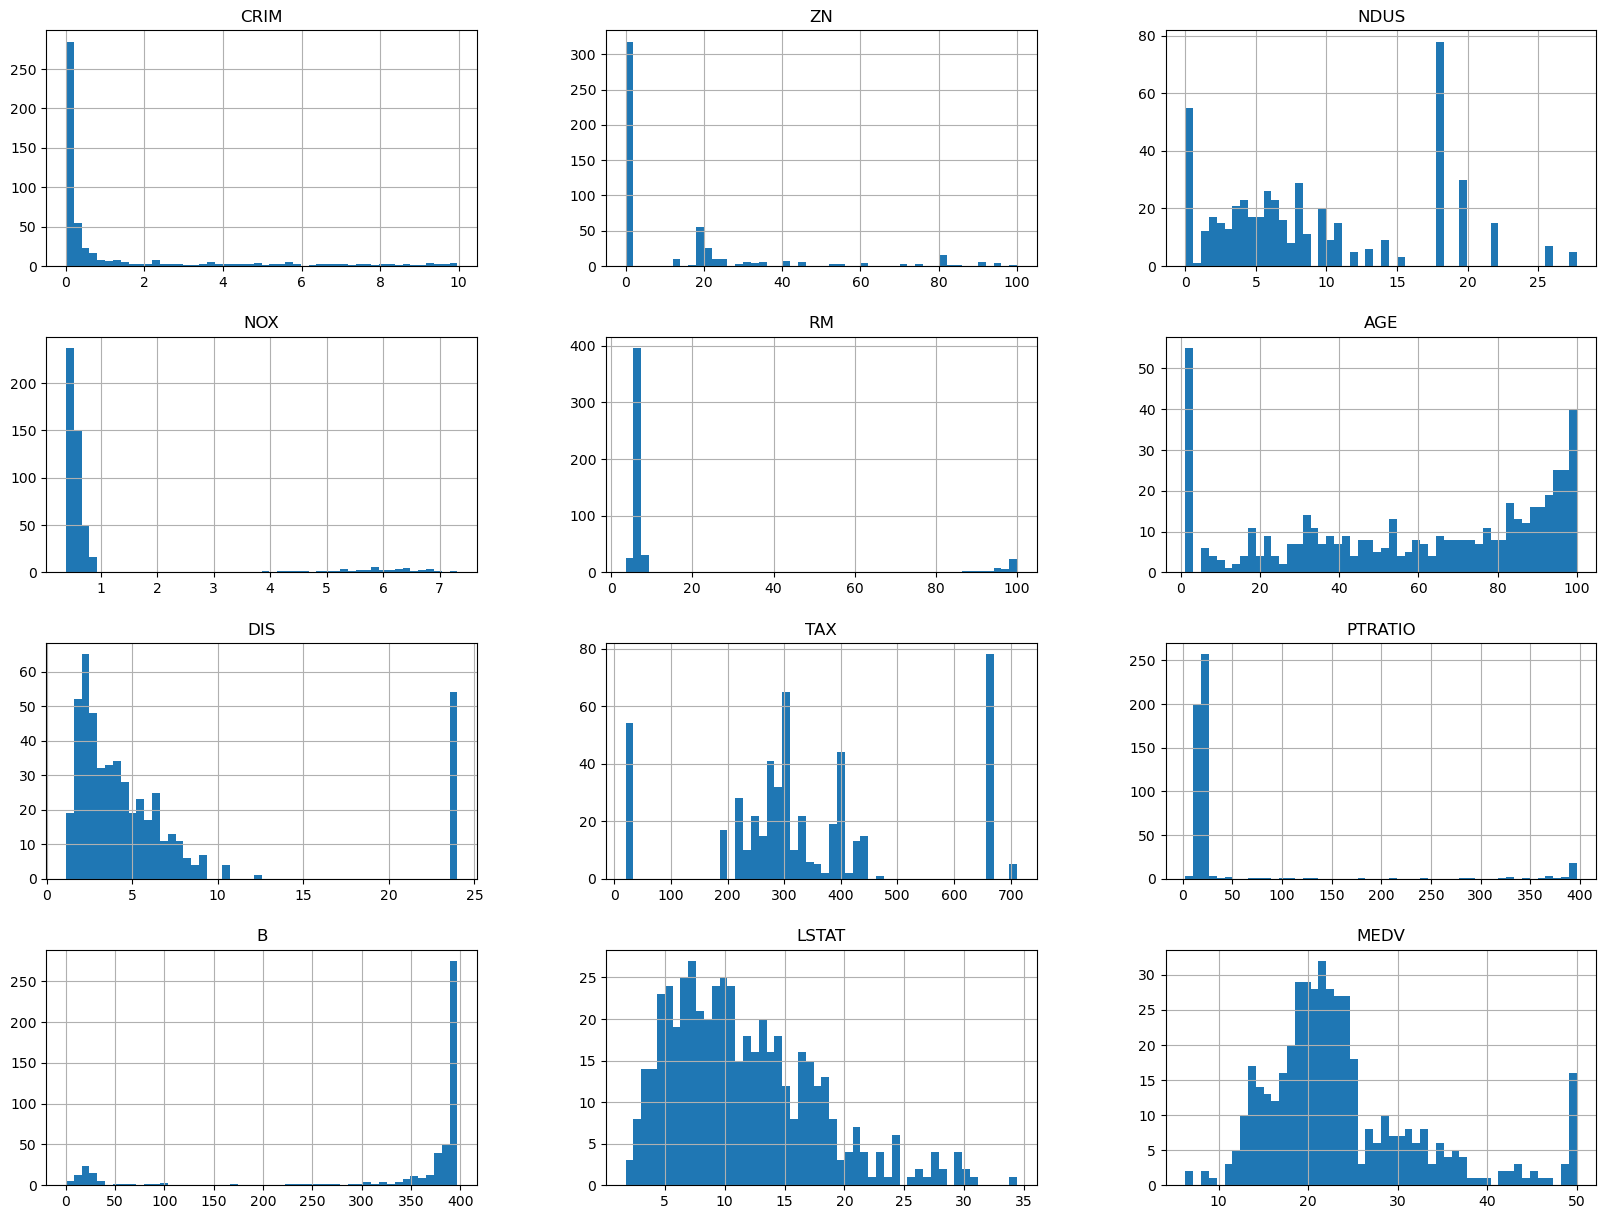

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.drop(columns=discrete).hist(bins=50, figsize=(20,15))
#housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

1. looking at the data spec file we see that the last statistic MEDV corresponds to the "Median value of owner-occupied homes in $1000's". There's also a note suggesting that the median value are capped at 50.000 US which one can see from looking at the historgram last bar at 50.
2. Distributions are varied, with some long tails, some concentrated, and some somehow spread. 

## 3 create a pipeline or simple median imputer and a standard scaler

Since we are not required to make a clean up or create new meaninful variables I will just take out the discrete variables and copy the steps of the pipeline and use the median imputer and the standard scaler.

In [62]:
housing_num=housing.drop(columns=discrete)
housing_num.info()
housing_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   NDUS     506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     452 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


,CRIM,ZN,NDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


I will check that it filled the missing values on MEDV (notice I'm skipping the MEDV variable in the scaler)

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
        ('std_scaler', StandardScaler(), slice(0,-1) ),
        ('imputer', SimpleImputer(strategy="median"), ["MEDV"]),
    ])

housing_prepared = pd.DataFrame(
    transformer.fit_transform(housing_num),
    columns=list(housing_num)
    )

housing_prepared.info()
housing_prepared.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   NDUS     506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


,CRIM,ZN,NDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.526893,0.204324,-0.962669,-0.342280,-0.334818,0.195195,-0.321993,-0.239999,-0.312176,0.512058,-1.082336,24.0
1,-0.518136,-0.577404,-0.298101,-0.384216,-0.340481,0.609451,-0.186430,-0.539182,-0.283604,0.512058,-0.395747,21.6
2,-0.518144,-0.577404,-0.298101,-0.384216,-0.312386,0.071220,-0.186430,-0.539182,-0.283604,0.479549,-1.239130,34.7
3,-0.516024,-0.577404,-0.980819,-0.390902,-0.319263,-0.391416,-0.017173,-0.649991,-0.273318,0.493927,-1.419029,33.4
4,-0.500721,-0.577404,-0.980819,-0.390902,-0.313783,-0.137420,-0.017173,-0.649991,-0.273318,0.512058,-1.024570,36.2


and it did, so all nice and well.

## 4 Set the random seed to 0. Split the training (80%) and the test set (20%) using scikit-learn (no stratified sampling necessary.)

I will use the same code as well and make a copy of the train and test set just in case.

In [65]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_prepared, test_size=0.2, random_state=0)

In [66]:
train_housing=train_set.copy()
train_housing.head()

,CRIM,ZN,NDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
220,-0.380129,-0.577404,-0.419566,-0.361121,-0.320991,0.899732,-0.511838,-0.179054,-0.288176,0.470524,-0.301671,26.70
71,-0.463292,-0.577404,0.224060,-0.418252,-0.357397,-1.247143,-0.136940,-0.190135,-0.267604,0.352631,-0.273613,21.70
240,-0.482263,0.725476,-0.596877,-0.409135,-0.322977,-0.134396,0.025161,-0.217837,-0.297319,0.466929,-0.026045,22.00
6,-0.492694,-0.034537,-0.186408,-0.350789,-0.355521,0.237527,-0.094715,-0.156893,-0.313319,0.501674,0.147253,22.90
417,-0.529530,0.208667,-1.285180,2.554346,2.699938,-1.726486,2.755271,-1.768049,0.968529,-2.445325,-0.187790,21.95


In [67]:
test_housing=test_set.copy()
test_housing.head()

,CRIM,ZN,NDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
329,-0.501476,-0.577404,-0.832827,-0.389686,-0.343717,-1.256214,-0.148177,0.502418,-0.293890,0.338813,-0.692829,22.60
371,3.322342,-0.577404,1.241856,-0.285758,-0.348020,1.247466,-0.773444,1.809959,-0.256175,0.266448,-0.331379,50.00
219,-0.481863,-0.577404,0.654075,-0.334987,-0.342246,1.017659,-0.434311,-0.350808,-0.299604,0.486818,-0.171285,23.00
403,-0.529530,0.208667,-1.285180,2.581696,2.953677,-1.724813,2.755271,-1.768049,4.049034,-2.500197,-0.534385,21.95
78,-0.505974,-0.577404,0.506083,-0.403665,-0.347431,-0.152539,-0.179166,0.325125,-0.273318,0.428191,0.132398,21.20


## 5 Fit a linear regression model to the training data. Report Training MAE and Test MAE.

Let's first split the input and output of the train and test set

In [68]:
test_housing_input = test_housing.drop(columns=["MEDV"])
test_housing_output = test_housing["MEDV"]
print(list(test_housing_input))
print(test_housing_output.shape)

train_housing_input = train_housing.drop(columns=["MEDV"])
train_housing_output = train_housing["MEDV"]
print(list(train_housing_input))
print(train_housing_output.shape)


['CRIM', 'ZN', 'NDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
(102,)
['CRIM', 'ZN', 'NDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
(404,)


In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_housing_input, train_housing_output)

LinearRegression()

Now let's check how it works on some train data just in case

In [71]:
some_data = train_housing_input.iloc[:5]
some_outputs = train_housing_output.iloc[:5]
print(some_outputs)
print("Predictions:", lin_reg.predict(some_data))

220    26.70
71     21.70
240    22.00
6      22.90
417    21.95
Name: MEDV, dtype: float64
Predictions: [27.79574863 21.37589841 23.23028487 21.26445392 20.56830207]


Now let's make the train set absolute error (times 1000 to see the units in dollars)

In [74]:
from sklearn.metrics import mean_absolute_error

train_predictions=lin_reg.predict(train_housing_input)
train_mae = mean_absolute_error(train_housing_output, train_predictions)
train_mae*1000

3786.6257383650845

and now the test set absolute error

In [75]:
from sklearn.metrics import mean_absolute_error

test_predictions=lin_reg.predict(test_housing_input)
test_mae = mean_absolute_error(test_housing_output, test_predictions)
test_mae*1000

4547.516652086019